In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import re
import spacy
import nltk
from bs4 import BeautifulSoup
import unicodedata
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
from tqdm import tqdm
from wordsegment import load, segment
from autocorrect import Speller
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from nltk import word_tokenize
from collections import defaultdict, Counter
import pyLDAvis
from pyLDAvis import gensim as pLDAg
from wordcloud import WordCloud, STOPWORDS
load()
spell = Speller()

In [13]:
#df =pd.read_csv('data/df_train_spell_hash.csv')
df =pd.read_csv('data/tweets_normalized.csv')
df.head()

,id,tweet,tweet_normalized
0,1635430535047811073,"""Please help stop college vaccine mandates by ...",please help stop college vaccine mandate fill ...
1,1635430534657593347,RT @SandraYozipovic: Alberta woman's COVID-19 ...,rts ray oz ipo vic alberta woman covid19van in...
2,1635430531767865344,RT @amuse: CBS is now admitting Fauci funded c...,rt abuse cbs admit face fund coronavirus gain ...
3,1635430530735824897,@RonFilipkowski I take no responsibility for C...,ron flip row ski take responsibility co vid ba...
4,1635430529813151746,OMG. The 🤡🌎 we live in. 😆\n\nWell done @covid_...,omg live well doc oid parent httpstcoezm2gmkgph


Number of Characters

<AxesSubplot:>

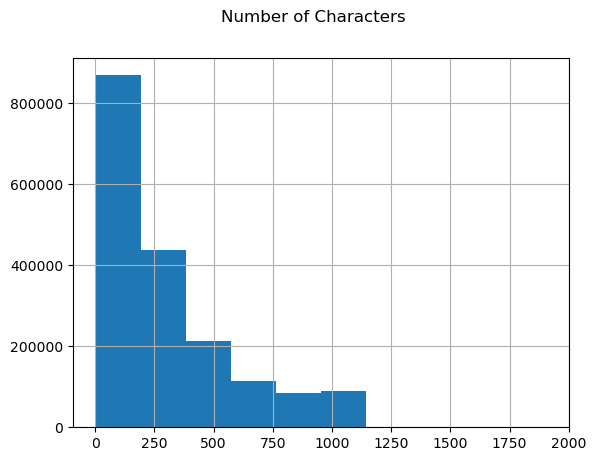

In [3]:
ax = df['comment_text'].str.len().hist()
plt.suptitle("Number of Characters")
ax

In [5]:
fig = ax.get_figure()
fig.savefig('num_of_chars.pdf')

<AxesSubplot:>

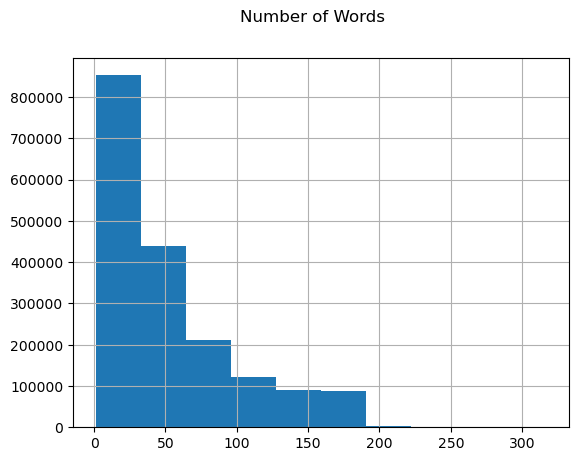

In [6]:
ax = df['comment_text'].str.split().map(lambda x: len(x)).hist()
plt.suptitle("Number of Words")
ax

In [7]:
fig = ax.get_figure()
fig.savefig('num_of_words.pdf')

Average Word Length

<AxesSubplot:>

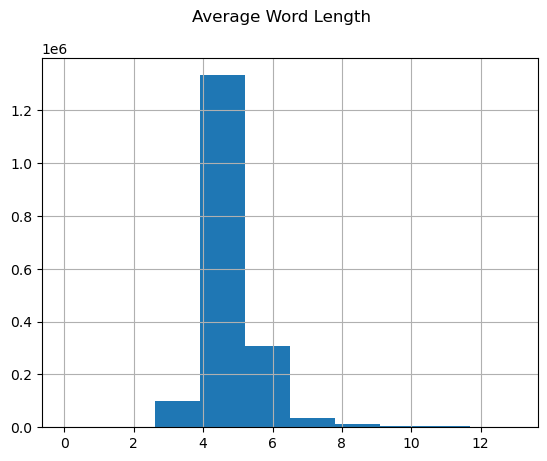

In [8]:
ax = df['comment_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist(range=[0,13])
plt.suptitle("Average Word Length")
ax

In [9]:
fig = ax.get_figure()
fig.savefig('avg_word_length.pdf')

Count Stopwords

In [10]:
stopwords=nltk.corpus.stopwords.words('english')

<BarContainer object of 10 artists>

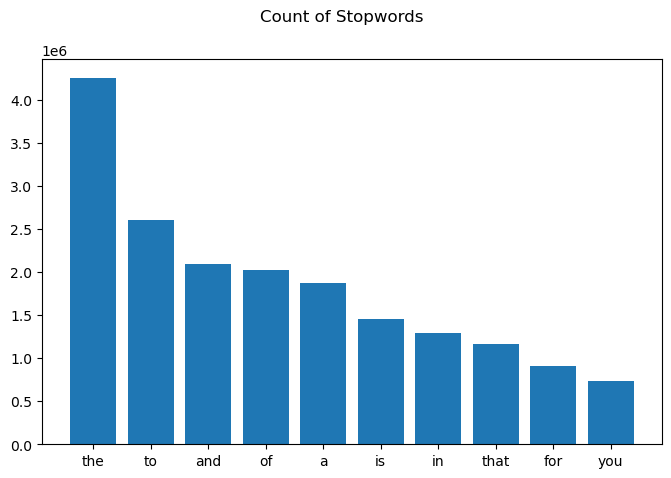

In [11]:
corpus=[]
new = df['comment_text'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1
top= sorted(dic.items(), key=lambda x:x[1], reverse=True)[:10]
x,y=zip(*top)
fig, ax = plt.subplots(figsize=(8,5))
ax = plt.bar(x,y)
plt.suptitle("Count of Stopwords")
ax

In [12]:
#fig = ax.get_figure()
fig.savefig('Stopword Count.pdf')

In [ ]:
counter=Counter(corpus)
most=counter.most_common()

x, y = [], []
for word, count in most[:40]:
    #if (word not in stopwords):
    x.append(word)
    y.append(count)
sns.barplot(x=y, y=x)

Ngram exploration

In [ ]:
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n,n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [ ]:
top_n_bigrams = get_top_ngrams(df['comment_text'],2)[:10]
x,y = map(list, zip(*top_n_bigrams))
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x=y, y=x)
plt.suptitle("Top Bigrams")
ax

In [ ]:
fig.savefig('bigrams.pdf')

In [ ]:
top_tri_grams = get_top_ngrams(df['comment_text'],n=3)
x,y = map(list, zip(*top_tri_grams))
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x=y, y=x)
plt.suptitle("Top Trigrams")
ax

In [ ]:
fig.savefig('trigrams.pdf')

Preprocessing

In [ ]:
nltk.download('punkt')

In [ ]:
nltk.download('wordnet')

In [ ]:
def preprocess_data(df):
    corpus = []
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for tweet in df['comment_text']:
        words = [w for w in word_tokenize(tweet) if (w not in stopwords)]
        words = [lem.lemmatize(w) for w in words if len(w)>2]
        corpus.append(words)
    return corpus

In [ ]:
corpus = preprocess_data(df)

Topic Modeling

In [ ]:
dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics = 4, id2word = dic, passes = 10, workers = 2)
lda_model.show_topics()

In [ ]:
pyLDAvis.enable_notebook()
vis = pLDAg.prepare(lda_model, bow_corpus, dic)
vis

In [ ]:
pyLDAvis.save_html(vis, 'pyLDAvis.html')

Word Cloud

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
def show_wordcloud(data):
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=100, max_font_size=30, scale=3, random_state=1)
    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12,12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.savefig('wordcloud.pdf')
    plt.show()

In [ ]:
show_wordcloud(corpus)

In [ ]:
df.head()

In [ ]:
dic = gensim.corpora.Dictionary(corpus)
dic.doc2bow(df['comment_text_normalized'].tolist())

In [ ]:
df['comment_text_normalized'].tolist()